### Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif,SelectKBest


df = pd.read_csv("C:/Users/Asus/Downloads/ineu/heart.csv")
df = pd.DataFrame(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Given Features are 

age

sex

cp : chest pain type (4 values)

trestbps : resting blood pressure

chol : serum cholestoral in mg/dl

fbs : fasting blood sugar > 120 mg/dl

restecg : resting electrocardiographic results (values 0,1,2)

thalach : maximum heart rate achieved

exang : exercise induced angina

oldpeak : ST depression induced by exercise relative to rest

slope : slope of the peak exercise ST segment

ca : number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [2]:
df['target'].value_counts().unique

<bound method Series.unique of target
1    526
0    499
Name: count, dtype: int64>

*  Distribution of 0 and 1 of target variable is nearly equal so additional sampling method not required 

### Data Preprocessing

In [3]:
print("Null\n",df.isnull().sum())
print("\nNaN\n",df.isna().sum())

Null
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

NaN
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df['oldpeak'] = df['oldpeak'].astype(dtype='int64') #converting from float64 to int64 

<Axes: >

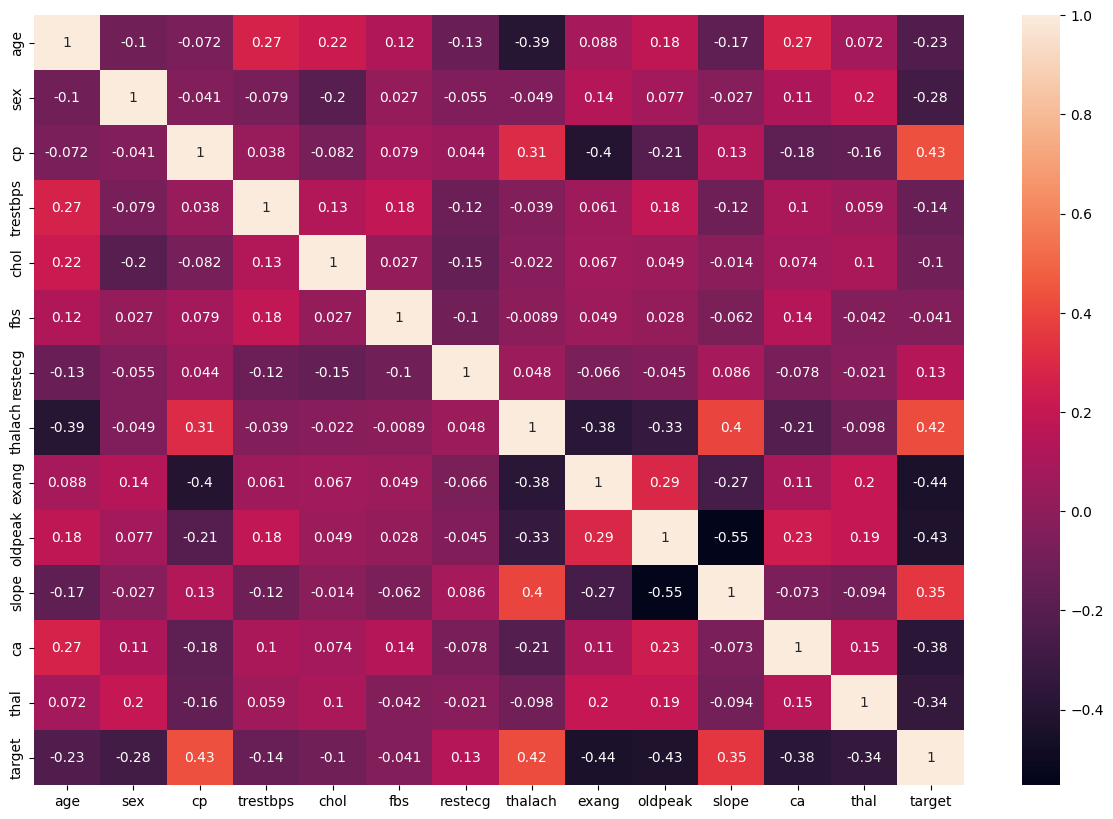

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

from Observation it can be noted that 'target' has highest positive correlation with cp,slope and thalach , it also has highest negative correlation with oldpeak ,ca , thal and exang

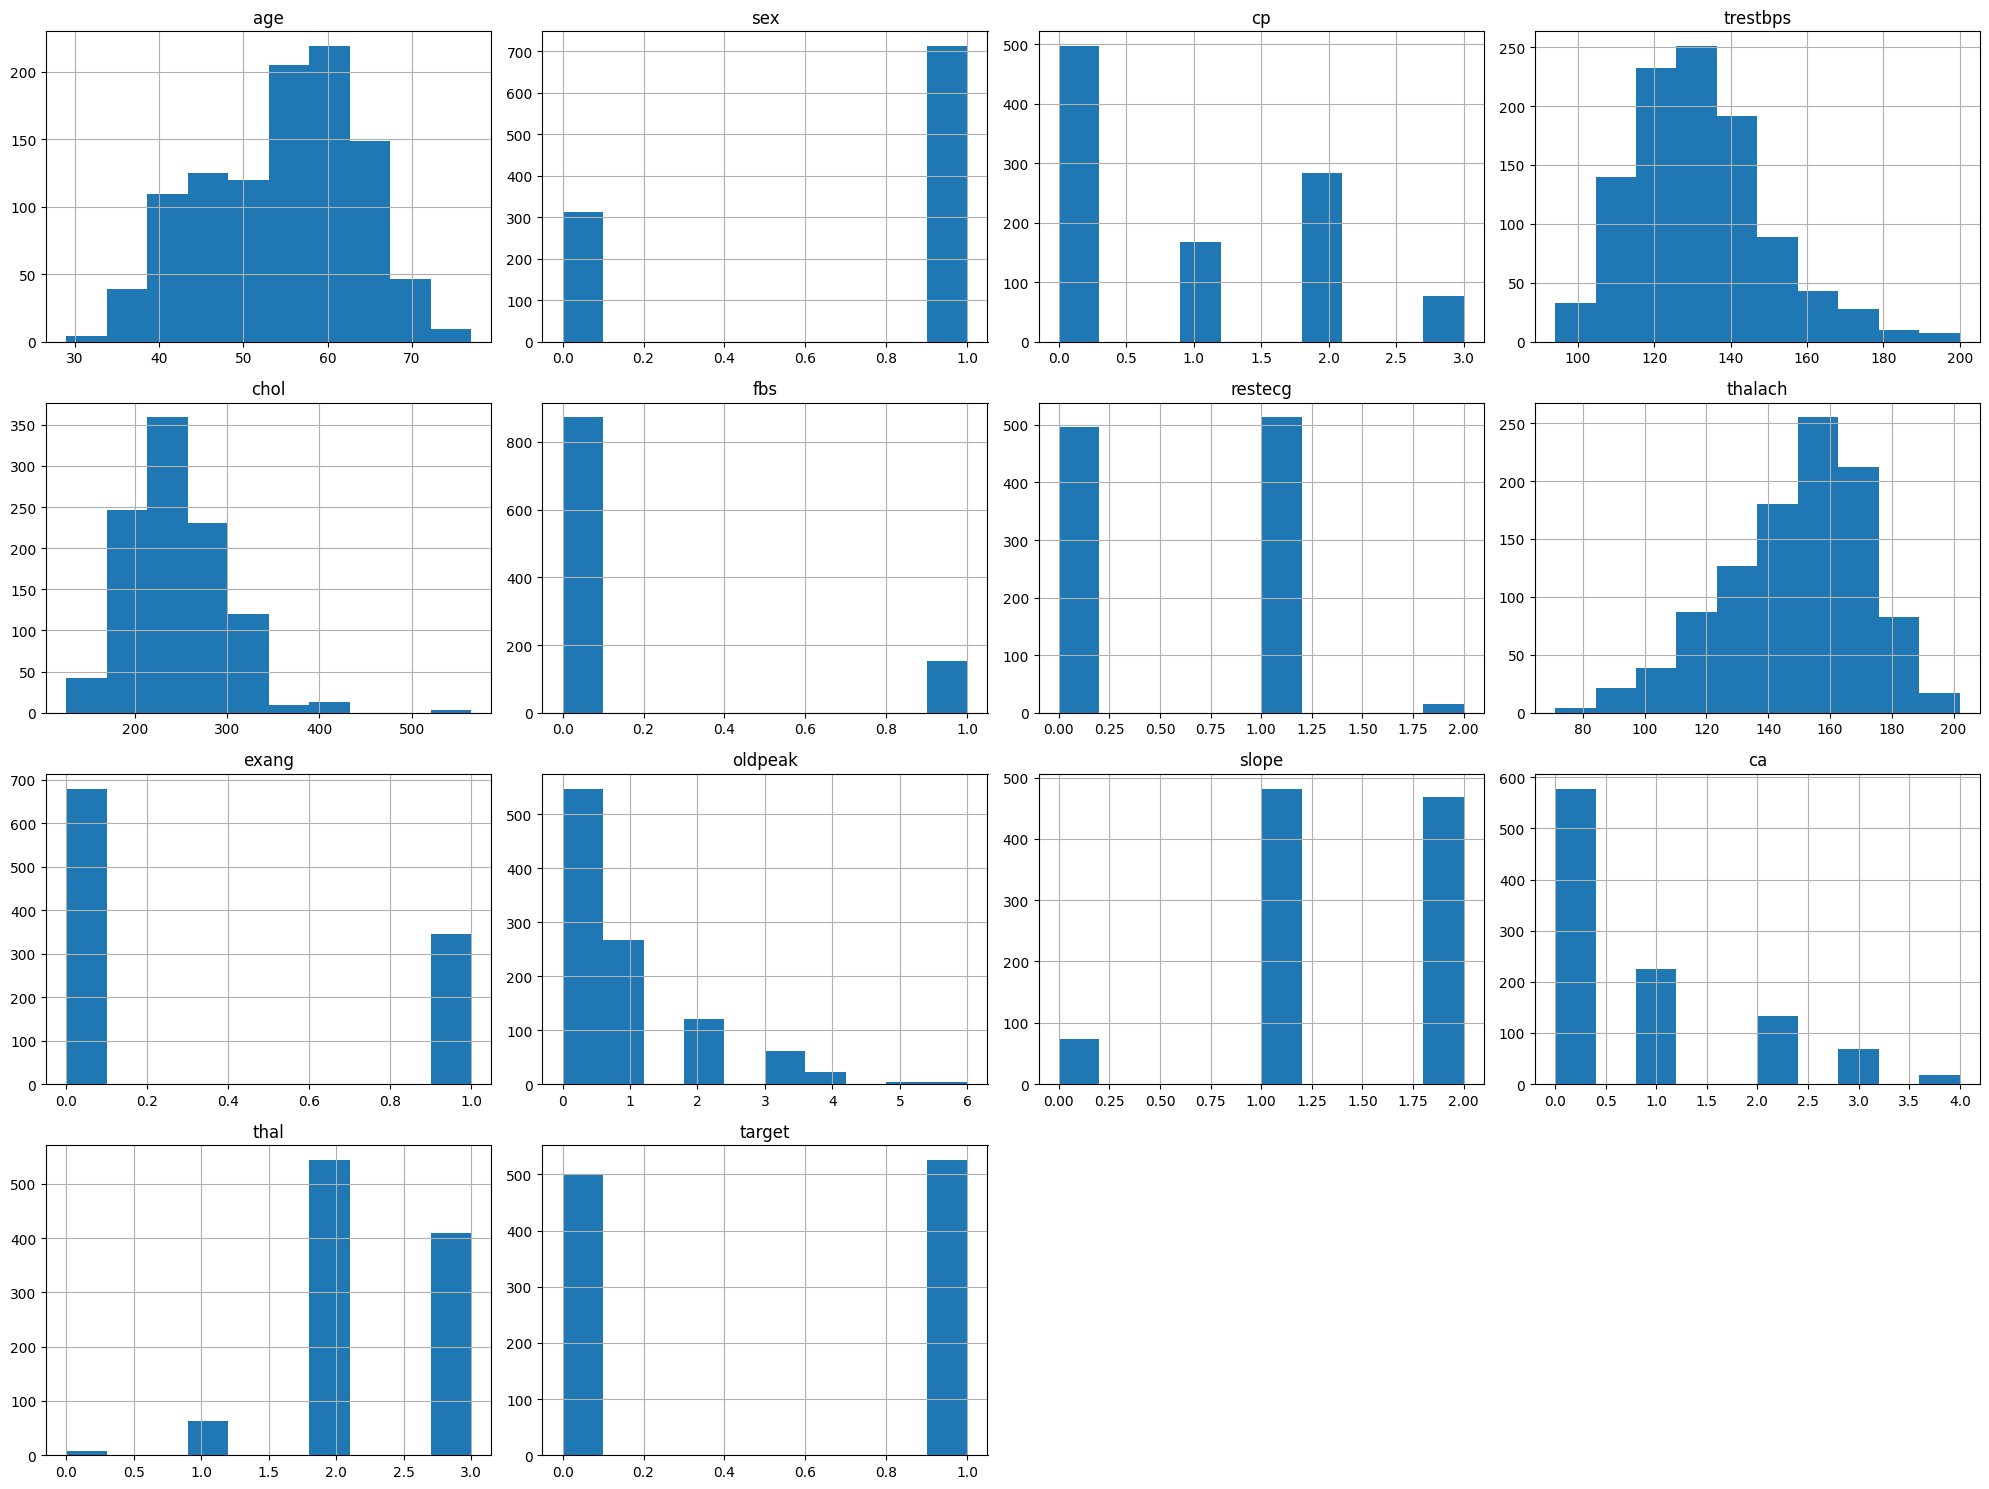

In [8]:
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

**Total Features - 13**

**Categorical Features(8)**- Sex, Cp, Fbs, restecg, exang, slope,ca, thal

**Quantitative Features(5)**- Age, Trestbps, chol, thalach, oldpeak

* Checking for Outliers

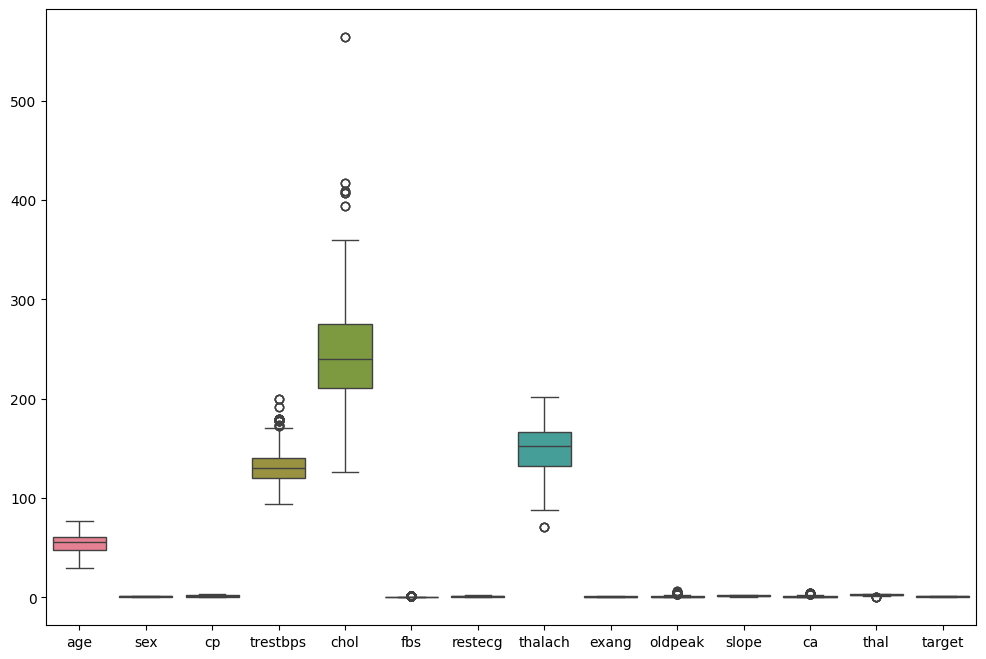

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()

<Axes: >

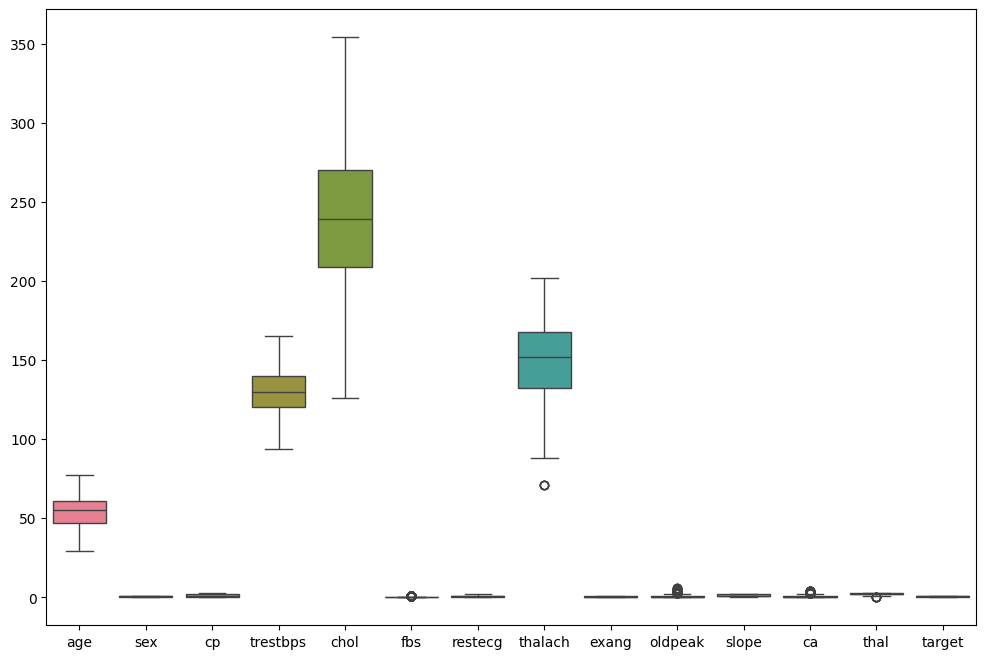

In [10]:
df = df[df['trestbps']<170]
df = df[df['chol']<360]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)

* It is observed no significant amount Outliers are present

* Visualizing Age Groups

In [11]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print("min =",minAge ,"max =", maxAge , "mean =",meanAge)

min = 29 max = 77 mean = 54.02809573361082


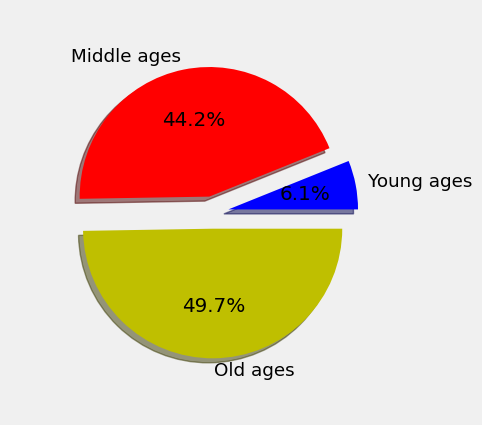

In [12]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Old = df[(df.age>55)]
plt.style.use('fivethirtyeight')
colors = ['b','r','y']
explode = [0.1,0.1,0.1]
plt.figure(figsize=(5,5))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Old)],labels=['Young ages','Middle ages','Old ages'],explode=explode,shadow=True,colors=colors, autopct='%1.1f%%',radius=0.8)
plt.show()

In [13]:
X=df.drop('target',axis=1)
y=df['target']

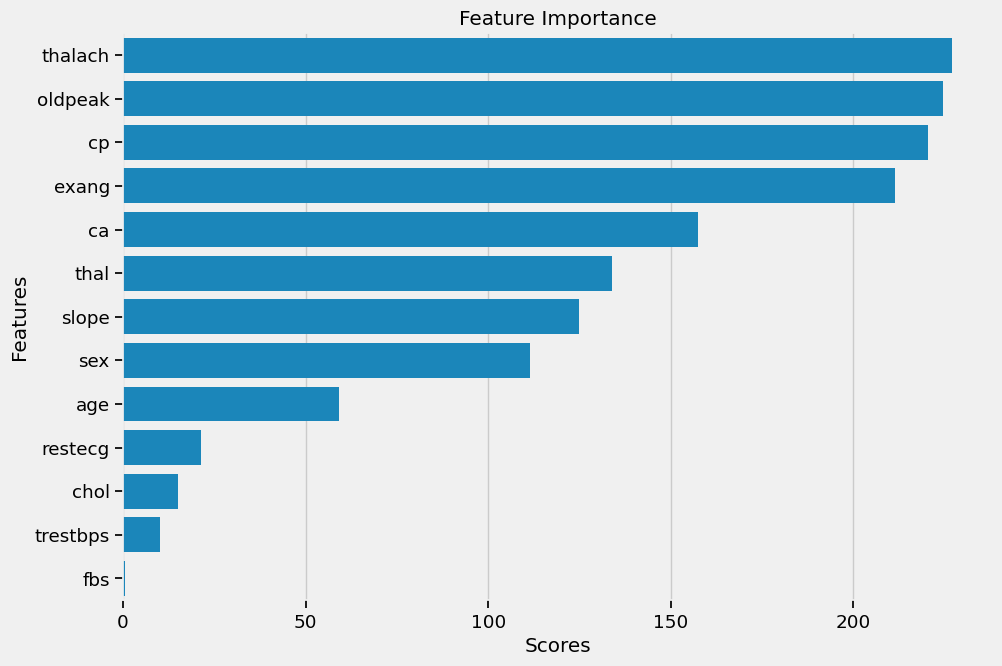

In [14]:
selector=SelectKBest(f_classif,k=13)
X_select=selector.fit_transform(X,y)

selected_features=X.columns[selector.get_support()]
feature_score=selector.scores_[selector.get_support()]
feature_score_df=pd.DataFrame({'Features':selected_features,'Scores':feature_score})
feature_score_df=feature_score_df.sort_values(by='Scores',ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x='Scores',y='Features',data=feature_score_df)
plt.title('Feature Importance')
plt.show()

* higher fvalue has stronger relation with target 
* such higher values from cp,thalach, exang, oldpeak, slope, ca, thal are significant features

In [15]:
X=X.drop(['fbs','trestbps','chol','restecg'],axis=1)
X

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,168,0,1,2,2,3
1,53,1,0,155,1,3,0,0,3
2,70,1,0,125,1,2,0,0,3
3,61,1,0,161,0,0,2,1,3
4,62,0,0,106,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...
1020,59,1,1,164,1,0,2,0,2
1021,60,1,0,141,1,2,1,1,3
1022,47,1,0,118,1,1,1,1,2
1023,50,0,0,159,0,0,2,0,2


* Standardizing the data

In [16]:
stds=StandardScaler()
columns_to_scale=['age','sex','cp','thal','exang','thalach','slope','ca','oldpeak']
X[columns_to_scale]=stds.fit_transform(X[columns_to_scale])
X.head()


,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,-0.221690,0.626701,-0.922181,0.813753,-0.696647,0.234628,0.971153,1.207808,1.122300
1,-0.112381,0.626701,-0.922181,0.258647,1.435448,2.161784,-2.297772,-0.731546,1.122300
2,1.745879,0.626701,-0.922181,-1.022367,1.435448,1.198206,-2.297772,-0.731546,1.122300
3,0.762094,0.626701,-0.922181,0.514849,-0.696647,-0.728950,0.971153,0.238131,1.122300
4,0.871404,-1.595658,-0.922181,-1.833676,-0.696647,0.234628,-0.663309,2.177484,-0.497115


<Axes: >

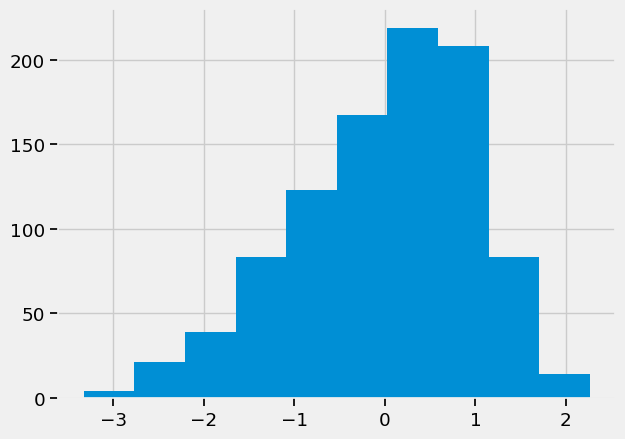

In [17]:
X.thalach.hist()

### Model Implementation

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
duplicate_rows = X[X.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows.value_counts())


Duplicate rows:
age        sex        cp         thalach    exang      oldpeak    slope      ca         thal     
-1.752021   0.626701   1.047187   1.027255  -0.696647  -0.728950   0.971153   3.147161  -0.497115    7
-2.735805   0.626701   0.062503   2.265568  -0.696647  -0.728950   0.971153  -0.731546  -0.497115    3
 0.324857   0.626701   1.047187   0.045144  -0.696647  -0.728950  -0.663309   0.238131   1.122300    3
 0.215548   0.626701   0.062503   0.600250  -0.696647  -0.728950   0.971153  -0.731546   1.122300    3
                                  0.856453  -0.696647  -0.728950  -2.297772  -0.731546  -0.497115    3
                                                                                                    ..
-0.986855   0.626701  -0.922181  -0.082957   1.435448  -0.728950  -0.663309   2.177484   1.122300    2
 0.215548   0.626701   2.031871   0.557550  -0.696647   0.234628  -0.663309  -0.731546   1.122300    2
 0.324857  -1.595658  -0.922181  -1.107768   1.435448  -0.728

* I have decided to use cross validation as 10 because certain duplicate rows are present so that the model does not train on same data 

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
print("Logistic Regression \n")
print("Accuracy: ",accuracy_score(y_test,y_pred1)*100,'%')
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred1))
print("Classification Report :\n",classification_report(y_test,y_pred1))

Logistic Regression 

Accuracy:  86.85121107266436 %
Confusion Matrix : 
 [[112  22]
 [ 16 139]]
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.84      0.85       134
           1       0.86      0.90      0.88       155

    accuracy                           0.87       289
   macro avg       0.87      0.87      0.87       289
weighted avg       0.87      0.87      0.87       289



In [21]:

from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(algorithm="SAMME")
ab.fit(X_train,y_train)
y_pred2=ab.predict(X_test)
print("\n AdaBoost ")
print("Accuracy: ",accuracy_score(y_test,y_pred2)*100,'%')
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred2))
print("Classification Report :\n",classification_report(y_test,y_pred2))


 AdaBoost 
Accuracy:  86.159169550173 %
Confusion Matrix : 
 [[114  20]
 [ 20 135]]
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       134
           1       0.87      0.87      0.87       155

    accuracy                           0.86       289
   macro avg       0.86      0.86      0.86       289
weighted avg       0.86      0.86      0.86       289



In [23]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print("Gaussian NB\n")
print("Accuracy: ",accuracy_score(y_test,y_pred3)*100,'%')
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred3))
print("Classification Report :\n",classification_report(y_test,y_pred3))

Gaussian NB

Accuracy:  87.19723183391004 %
Confusion Matrix : 
 [[114  20]
 [ 17 138]]
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       134
           1       0.87      0.89      0.88       155

    accuracy                           0.87       289
   macro avg       0.87      0.87      0.87       289
weighted avg       0.87      0.87      0.87       289



In [24]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)
y_pred4=svc.predict(X_test)
print("\nSVC")
print("Accuracy: ",accuracy_score(y_test,y_pred4)*100,'%')
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred4))
print("Classification Report :\n",classification_report(y_test,y_pred4))



SVC
Accuracy:  93.07958477508652 %
Confusion Matrix : 
 [[126   8]
 [ 12 143]]
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       134
           1       0.95      0.92      0.93       155

    accuracy                           0.93       289
   macro avg       0.93      0.93      0.93       289
weighted avg       0.93      0.93      0.93       289



knn , decision tree,extra trees and random forest were overfitting everytime so i left them out 

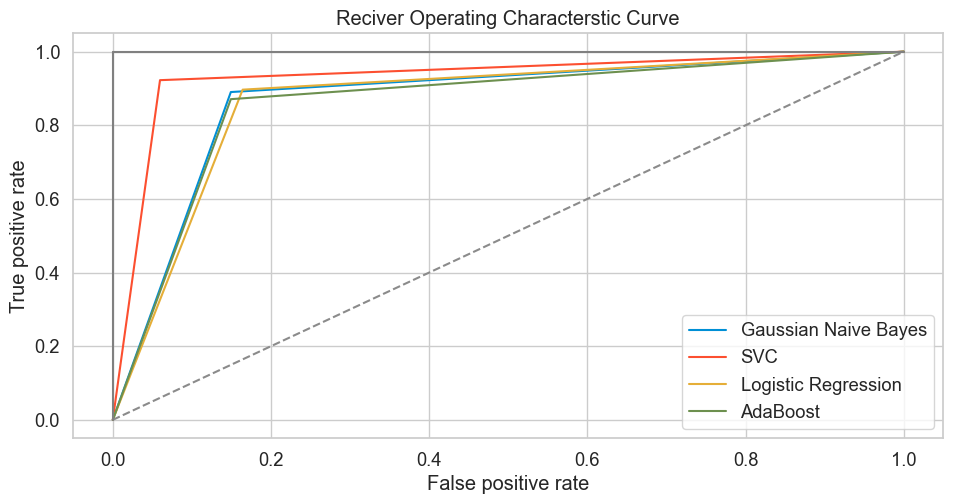

In [25]:
from sklearn.metrics import roc_curve
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,y_pred3)                                                        
svc_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,y_pred4)
lr_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,y_pred1)
et_false_positive_rate,et_true_positive_rate,dt_threshold = roc_curve(y_test,y_pred2)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Gaussian Naive Bayes')
plt.plot(svc_false_positive_rate,xgb_true_positive_rate,label='SVC')
plt.plot(lr_false_positive_rate,knn_true_positive_rate,label='Logistic Regression')
plt.plot(et_false_positive_rate,et_true_positive_rate,label='AdaBoost')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### Overfitting Check

In [26]:
training_accuracy1=accuracy_score(y_train,lr.predict(X_train))
testing_accuracy1 = accuracy_score(y_test, y_pred1)
print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy1:.4f}")
print(f"Testing Accuracy: {testing_accuracy1:.4f}")

training_accuracy2 = accuracy_score(y_train,ab.predict(X_train))
testing_accuracy2 = accuracy_score(y_test, y_pred2)
print("\n\nAdaBoost")
print(f"Training Accuracy: {training_accuracy2:.4f}")
print(f"Testing Accuracy: {testing_accuracy2:.4f}")

training_accuracy3 = accuracy_score(y_train,gnb.predict(X_train))
testing_accuracy3 = accuracy_score(y_test, y_pred3)
print("\n\nGaussian NB")
print(f"Training Accuracy: {training_accuracy3:.4f}")
print(f"Testing Accuracy: {testing_accuracy3:.4f}")

training_accuracy4 = accuracy_score(y_train,svc.predict(X_train))
testing_accuracy4 = accuracy_score(y_test, y_pred4)
print("\n\nSVC")
print(f"Training Accuracy: {training_accuracy4:.4f}")
print(f"Testing Accuracy: {testing_accuracy4:.4f}")


Logistic Regression
Training Accuracy: 0.8482
Testing Accuracy: 0.8685


AdaBoost
Training Accuracy: 0.8467
Testing Accuracy: 0.8616


Gaussian NB
Training Accuracy: 0.8274
Testing Accuracy: 0.8720


SVC
Training Accuracy: 0.9226
Testing Accuracy: 0.9308


### Observation 
* All models are well-fitted.

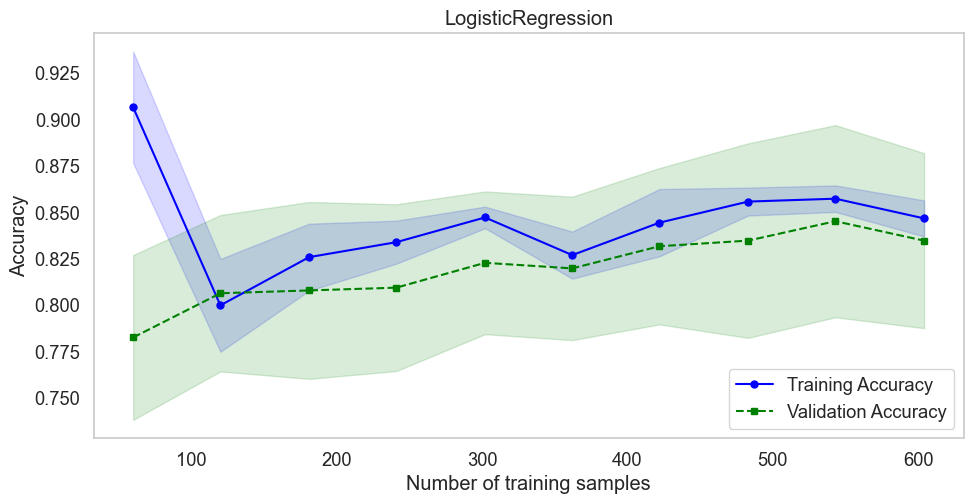

In [27]:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lr,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training Accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.title('LogisticRegression')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


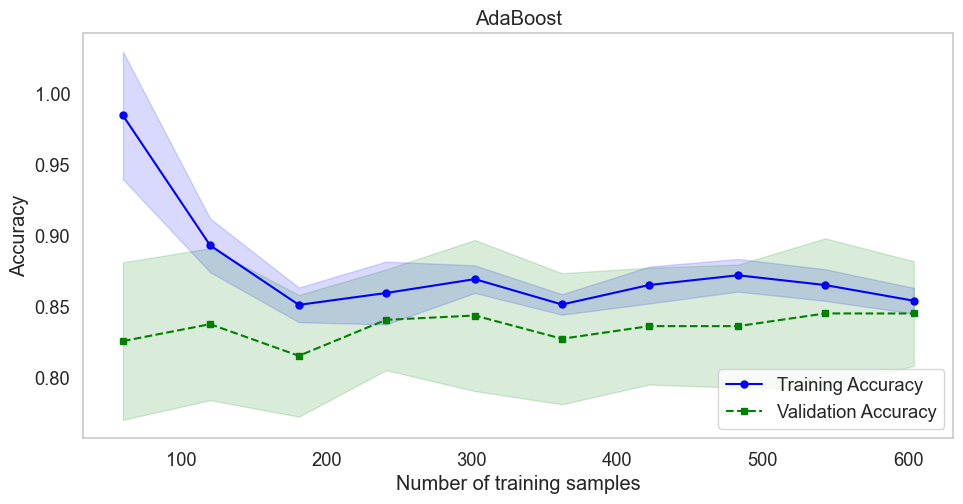

In [28]:
train_sizes, train_scores, test_scores = learning_curve(estimator=ab,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training Accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.title('AdaBoost')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

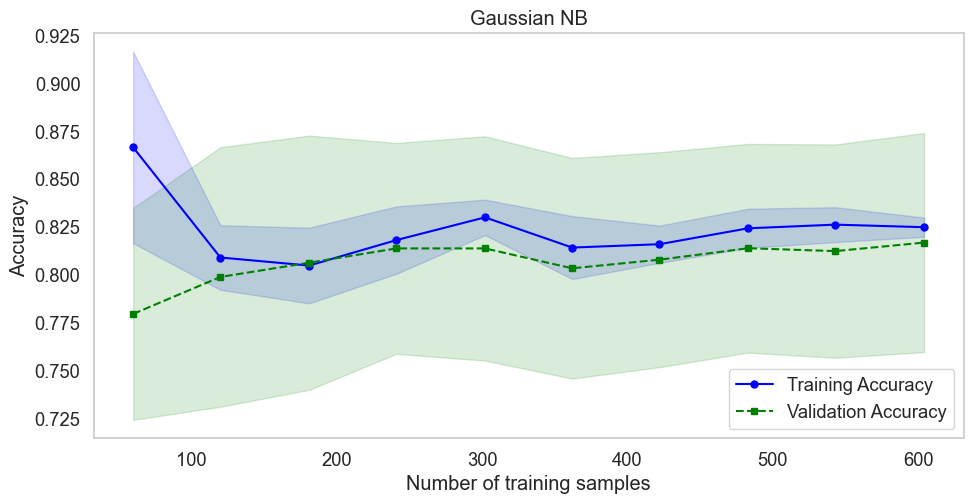

In [29]:
train_sizes, train_scores, test_scores = learning_curve(estimator=gnb,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training Accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.title('Gaussian NB')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

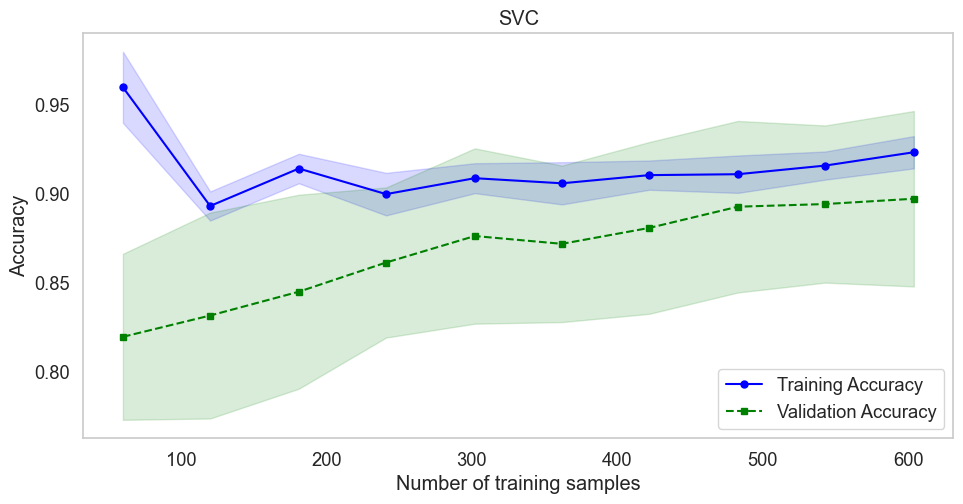

In [30]:

train_sizes, train_scores, test_scores = learning_curve(estimator=svc,X=X_train,y=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.figure(figsize=(10,5))
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='Training Accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='Validation Accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
plt.grid()
plt.title('SVC')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

### Conclusion 
As none of the model is overfitting / underfitting , hyperparameter tuning is not required.

Also **Support Vector Classifier** is outperforming all models with Accuracy of 93%.